# ¿Cómo crece una población? 


> El modelo más simple de crecimiento poblacional de organismos es $\frac{dx}{dt}=rx$, donde $x(t)$ es la población en el tiempo $t$ y $r>0$ es la tasa de crecimiento.

> Este modelo predice crecimiento exponencial $x(t)=x_0e^{rt}$ (solución de la ecuación diferencial) donde $x_0=x(0)$ es la población inicial. ¿Es esto válido?
- Recordar que $\lim_{t\to\infty}x(t)=x_0\lim_{t\to\infty}e^{rt}=\infty$.
- Este modelo no tiene en cuenta entonces sobrepoblación ni recursos limitados.

> En realidad la tasa de crecimiento no es una constante, sino que depende de la población $\frac{dx}{dt}=\mu(x)x$. Cuando $x$ es pequeña $\mu(x)\approx r$, como antes, pero cuando $x>1$ y $\mu(x)<0$: la tasa de muerte es mayor a la tasa de nacimiento. Una forma matemática conveniente de modelar lo anterior es con una tasa de crecimiento $\mu(x)$ decreciendo linealmente con $x$.

Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

<img style="float: center;" src="./poblacion.jpg" width="450px" height="250px" />

___
Entonces, con esta elección de $\mu(x)=r(1-x)$, obtenemos la llamada **ecuación lógistica**, publicada por Pierre Verhulst en 1838.

$$\frac{dx}{dt} = r\; x\; (1- x)$$

> **Ver el video donde se habla de esta ecuación más a detalle [link](https://www.youtube.com/watch?v=EOvLhZPevm0)**

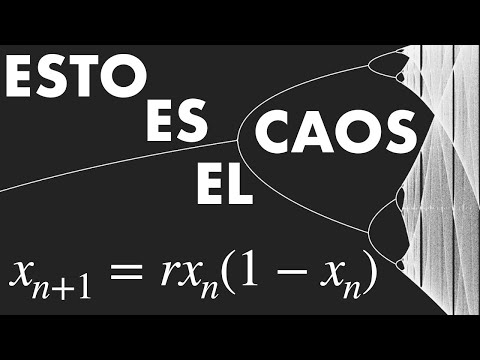

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EOvLhZPevm0')

**Solución a la ecuación diferencial** 

La ecuación diferencial inicial tiene *solución analítica*, 
$$ x(t) = \frac{1}{1+ \left(\frac{1}{x_{0}}- 1\right) e^{-rt}}.$$

Graficamos varias curvas de la solución analítica para $r = \left[-1, 1\right]$.

In [2]:
%matplotlib widget

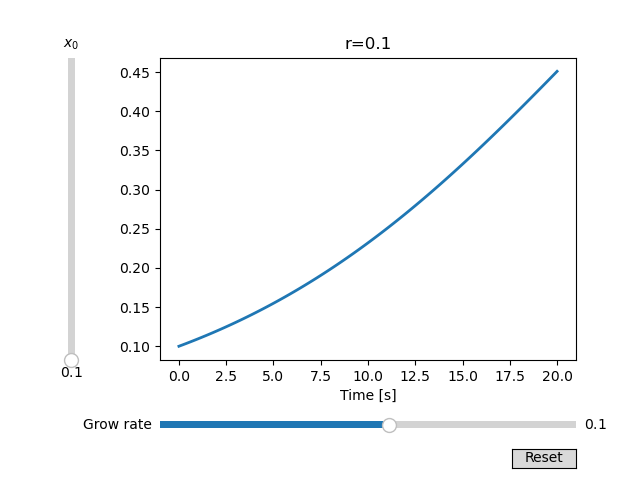

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, x0, r):
    return 1/(1+(1/x0-1)*np.exp(-r*t))

t = np.linspace(0, 20, 100)

# Define initial parameters
init_x0 = 0.1
init_r = 0.1

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_x0, init_r), lw=2)
ax.set_xlabel('Time [s]')
ax.set_title(f'r={init_r:.2}')


# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the grow rate.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Grow rate',
    valmin=-1,
    valmax=1,
    valinit=init_r,
)

# Make a vertically oriented slider to control the initial condition
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="$x_0$",
    valmin=init_x0,
    valmax=5,
    valinit=init_x0,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    y = f(t, amp_slider.val, freq_slider.val)
    line.set_ydata(y)
    fig.canvas.draw_idle()
    ax.set_ylim([min(y) * .9 , max(y) *1.1])
    ax.set_title(f'r={freq_slider.val:.2}')

# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()

    
button.on_clicked(reset)

plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

# Definir la solución analítica x(t,x0)
def sol_ana(t,x0,r):
    return 1/(1+(1/x0-1)*np.exp(-r*t))

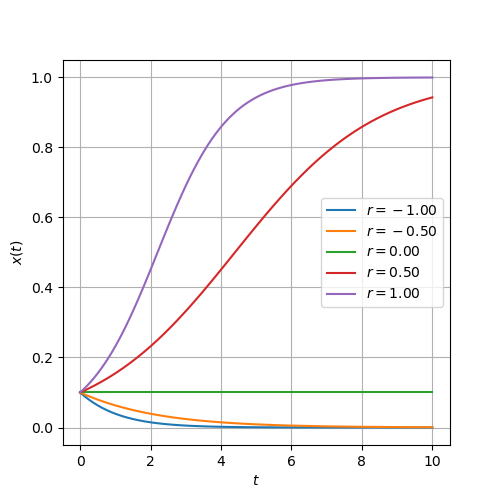

In [44]:
# Graficar para diferentes r entre -1 y 1
R = np.linspace(-1,1,5)
t = np.linspace(0,10,100)
x0 = 0.1

plt.figure(figsize=(5,5))

for r in R:
    plt.plot(t,sol_ana(t,x0,r),label='$r=%.2f$'%r)


plt.ylabel('$x(t)$')
plt.xlabel('$t$')
plt.legend(loc='best')
plt.grid()
plt.show()

Como se puede observar de las figuras anteriores, la solución a está ecuación en el continuo nos puede garantizar la extinción o bien un crecimiento descomunal, dependiendo del valor asignado a $r$. 

*Numéricamente*, ¿cómo resolveríamos esta ecuación? 

In [56]:
# Definimos el campo de la ecuación diferencial
def ecu_difer(t,x):
    r=1
    dx = r*(1-x)*x
    return dx
    

In [57]:
# Condición inicial
x0 = [0.1]

# Vector de tiempo
t=(0,10)

# Solución
sol1 = ode.solve_ivp(ecu_difer,t,x0,max_step=0.1)
sol1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 608
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10. ])
 t_events: None
        y: array([[0.1       , 0.10936687, 0.11949463, 0.13042292, 0.14218925,
        0.1548281 , 0.16836988, 0.18283983,

In [59]:
%matplotlib inline

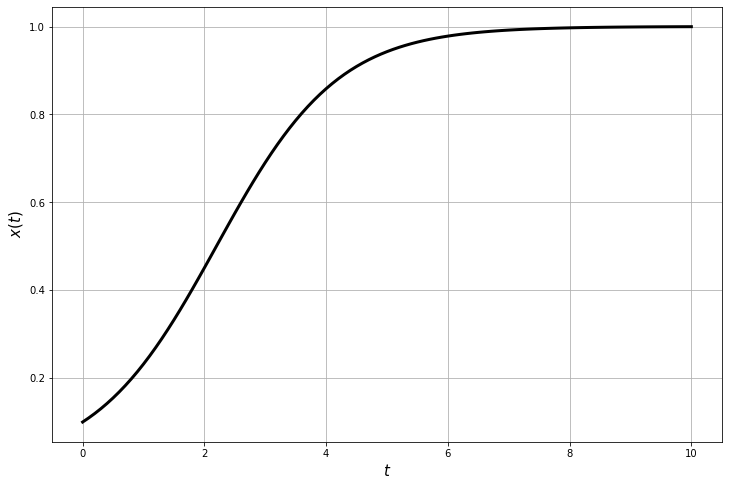

In [61]:
# Gráfico de la solución
t = sol1.t
x = sol1.y.T

plt.figure(figsize=(12,8))
plt.plot(t,x, 'k', lw=3)

plt.xlabel('$t$',fontsize=15)
plt.ylabel('$x(t)$',fontsize=15)

plt.grid()
plt.show()

### ¿Qué tan buena es la aproximación de la solución numérica?
Hay ecuaciones diferenciales ordinarias no lineales para las cuales es imposible obtener la solución exacta. En estos casos, se evalúa una solución aproximada de forma numérica.

Para el caso anterior fue posible obtener la solución exacta, lo cual nos permite comparar ambas soluciones y evaluar qué tan buena es la aproximación que nos brinda la solución numérica.

Primero veamos esto gráficamente

In [63]:
# Solución numérica
xnum = x

# Solución exacta
xexac = sol_ana(t,0.1,r)

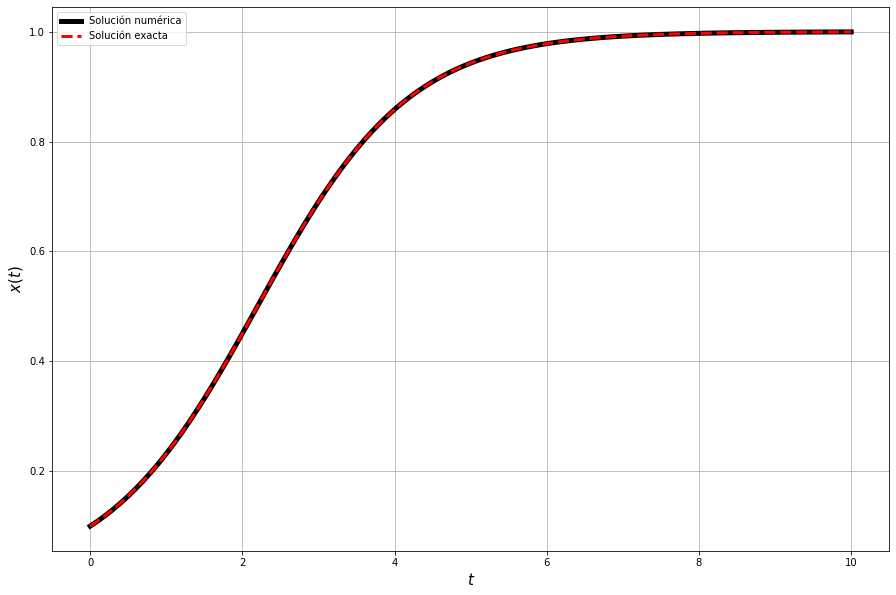

In [64]:
# Gráfica de comparación
plt.figure(figsize=(15,10))

plt.plot(t,xnum,'k',lw=5, label='Solución numérica')
plt.plot(t,xexac, '--r', lw=3,label='Solución exacta')

plt.xlabel('$t$',fontsize=15)
plt.ylabel('$x(t)$', fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

Gráficamente vemos que la solución numérica está cerca (coincide) con la solución exacta. Sin embargo, con esta gráfica no podemos visualizar qué tan cerca están una solución de la otra. ¿Qué tal si evaluamos el error?

In [66]:
xnum.shape, xexac.shape
# xnum=xnum.reshape(len(xnum))
# xnum.shape, xexac.shape

((102,), (102,))

In [67]:
error = np.abs(xnum-xexac)

In [68]:
# Error de aproximación
error = np.abs(xnum-xexac)

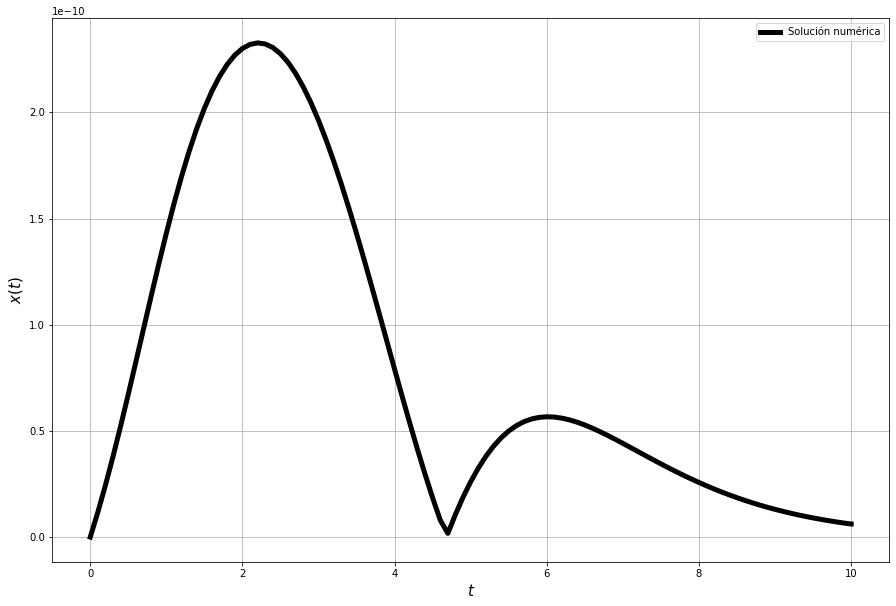

In [69]:
# Gráfica del error
plt.figure(figsize=(15,10))

plt.plot(t,error,'k',lw=5, label='Solución numérica')

plt.xlabel('$t$',fontsize=15)
plt.ylabel('$x(t)$', fontsize=15)

plt.legend(loc='best')
plt.grid()
plt.show()

## Ejemplo

La Epidemiología Matemática moderna surge a finales del primer cuarto del siglo XX con el trabajo de W.O. Kermack y A.G. McKendrick[$^1$](https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.1927.0118). En éste se presenta un modelo matemático basado en un sistema de ecuaciones diferenciales ordinarias que simula la propagación de la peste bubónica acaecida en Londres entre los años de 1665 a 1666 y que se saldó con la muerte del 20% de la población. Su característica fundamental es que se trata del primer modelo compartimental en el que la población es dividida en tres compartimentos o clases diferentes: individuos susceptibles, individuos infecciosos e individuos recuperados o muertos.

Un sistema modificado de Kermack y McKendrick, añade la tasa de mortalidad y la tasa de nacimientos[$^2$](http://search.ebscohost.com.ezproxy.iteso.mx/login.aspx?direct=true&db=nlebk&AN=482163&lang=es&site=ehost-live&ebv=EB&ppid=pp_Cover), de modo que las ecuaciones diferenciales que dscriben la propagación de enfermedades infecciosas queda como sigue:
\begin{eqnarray}
\frac{dx_1}{dt}&=&c(x_1+x_3)-\mu x_1-\frac{a}{N}x_1x_2\\
\frac{dx_2}{dt}&=&-\mu x_2+\frac{a}{N}x_1x_2-bx_2\\
\frac{dx_3}{dt}&=&-\mu x_3+pbx_2.
\end{eqnarray}
Donde $x_1$ representa el número de individuos susceptibles, $x_2$ describe el número de individuos infectados y $x_3$ el número de individuos recuperados. El parámetro $a$ representa el índice de transmisión, $b$ representa el índice de recuperación, $N=x_1+x_2+x_3$ es el número total de habitantes, $\mu$ la tasa de mortalidad, $c$ representa la tasa de crecimiento y $p$ la probabilidad de generar inmunidad.

A la fecha, las estadísticas para el SARS-CoV2/COVID-19[$^3$](https://www.worldometers.info/coronavirus/coronavirus-cases/) son:
\begin{eqnarray}
\mu&=&0.0075\\
b&=&0.33
\end{eqnarray}
Además, según Li et al.[$^4$](https://onlinelibrary.wiley.com/doi/full/10.1002/jmv.25685), de la población china infectada, entre el 30% y el 60% presentó inmunidad a los patógenos $\alpha$- y $\beta$-CoVs, por lo que se considera
$$p=0.45$$
La tasa de transmición en condiciones de humedad relativa por debajo del 24% en invierno y con una distancia menor a un metro está entre 50% y el 80%[$^5$](https://www.worldometers.info/coronavirus/transmission/), considere entonces
$$
a=0.65
$$
Finalmente, según la página Worldometer[$^6$](https://www.worldometers.info/es/) $N_{inicial}=x_1(0)=7,781,182,000$ y $c=0.018$.

Resuelva el sistema de ecuaciones diferenciales con los datos proporcionados y con $x_1(0)=N_{inicial}$, $x_2(0)=1$, $x_3(0)=0$ y muestre en un gráfico la evolución de la población con el tiempo suficiente para llegar a un punto máximo de infección. Y ¿cuántos años la población total ($N$) recupera su ritmo de crecimiento?

**Ejercicio**: escribir el conjunto de ecuaciones diferenciales en la siguiente función

In [13]:
#Ecuación diferencial
def covid(t,x):
    #Descomponer el vector x
    
    #Parámetros del sistema

    
    #Definir sistema de ecuaciones diferenciales

    return  

In [14]:
# Intervalo de tiempo
t1 = (0,500)

#Condición Inicial
x0 = [7781182000,1,0]

# Solución
sol2 = ode.solve_ivp(covid,t1,x0,max_step=0.1)
sol2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 30008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 9.51854688e-03, 1.04704016e-01, ...,
       4.99804704e+02, 4.99904704e+02, 5.00000000e+02])
 t_events: None
        y: array([[7.78118200e+09, 7.78195973e+09, 7.78974127e+09, ...,
        2.75445440e+10, 2.75549022e+10, 2.75647727e+10],
       [1.00000000e+00, 1.00297897e+00, 1.03326119e+00, ...,
        1.75475170e+09, 1.75555822e+09, 1.75632685e+09],
       [0.00000000e+00, 1.41555806e-03, 1.57995473e-02, ...,
        2.30367555e+10, 2.30455386e+10, 2.30539137e+10]])
 y_events: None

In [15]:
t = sol2.t
x = sol2.y.T
x1 = x[:,0]
x2 = x[:,1]
x3 = x[:,2]

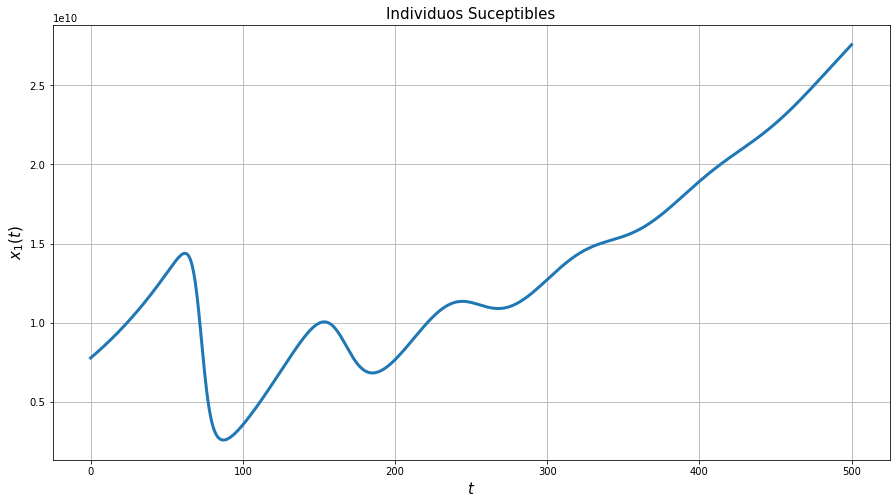

In [16]:
plt.figure(figsize=(15,8))
plt.plot(t,x1,lw=3)

plt.title('Individuos Suceptibles', fontsize=15)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$x_1(t)$',fontsize=15)

plt.grid()
plt.show()

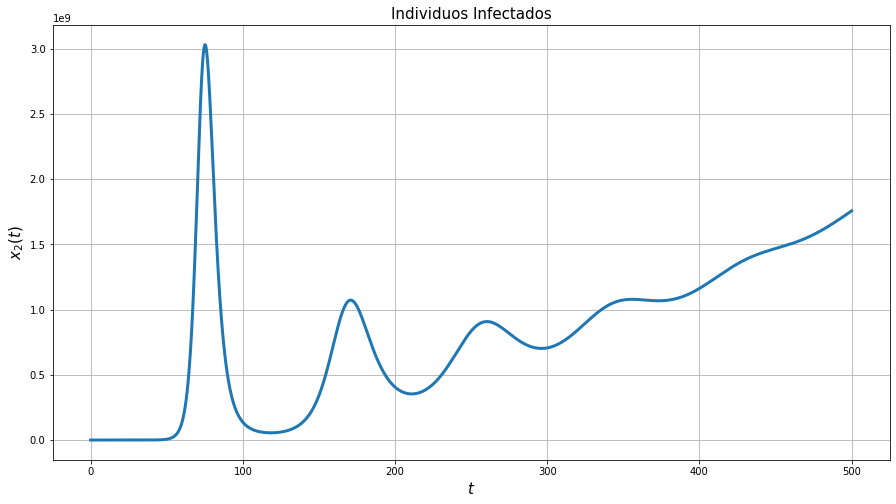

In [17]:
plt.figure(figsize=(15,8))
plt.plot(t,x2,lw=3)

plt.title('Individuos Infectados', fontsize=15)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$x_2(t)$',fontsize=15)

plt.grid()
plt.show()

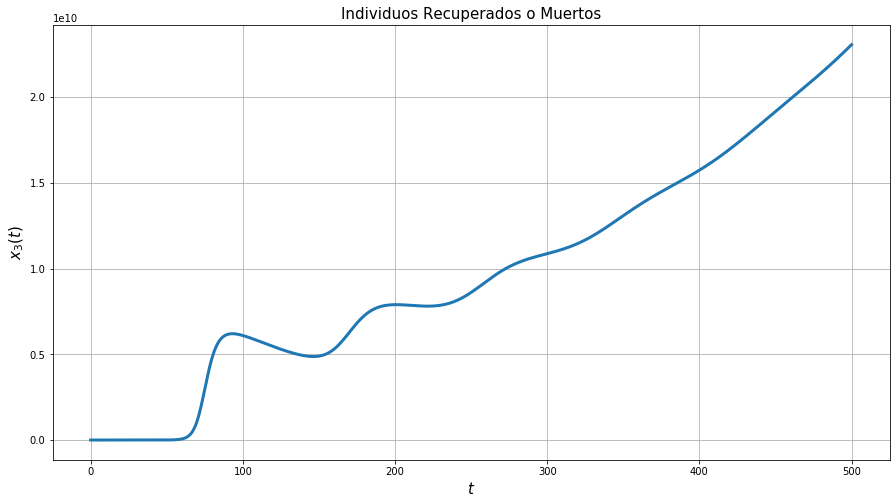

In [18]:
plt.figure(figsize=(15,8))
plt.plot(t,x3,lw=3)

plt.title('Individuos Recuperados o Muertos', fontsize=15)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$x_3(t)$',fontsize=15)

plt.grid()
plt.show()

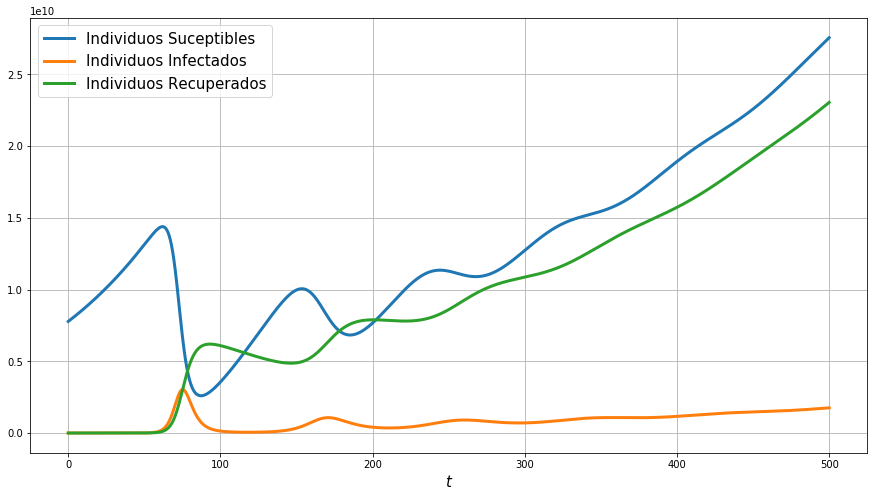

In [19]:
plt.figure(figsize=(15,8))

plt.plot(t,x1,lw=3, label='Individuos Suceptibles')
plt.plot(t,x2,lw=3, label='Individuos Infectados')
plt.plot(t,x3,lw=3, label='Individuos Recuperados')


plt.xlabel('$t$',fontsize=15)
#plt.ylabel('$x_3(t)$',fontsize=15)

plt.legend(loc='best', fontsize=15)
plt.grid()
plt.show()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>